In [ ]:
import pandas as pd
import numpy as np

#import matplotlib.pyplot as plt
#import seaborn as sns
#import zipfile
#import os

#pd.set_option("display.max_columns", None)   # show all columns
#pd.set_option("display.max_colwidth", None) # show full column content
#pd.set_option('display.max_rows', 700)

In [ ]:
"""
# this takes 10+_ish minutes to load
with zipfile.ZipFile(r'complaints.csv.zip') as myzip:

    with myzip.open('complaints.csv', mode='r', pwd=None, force_zip64=False) as file:
        df=pd.read_csv(file)
"""


"\nwith zipfile.ZipFile(r'complaints.csv.zip') as myzip:\n\n    with myzip.open('complaints.csv', mode='r', pwd=None, force_zip64=False) as file:\n        df=pd.read_csv(file)\n"

In [ ]:
df=pd.read_csv('Consumer_Complaints_usb.csv')

In [ ]:
# create a Tableau Public set
#excel_data=df.sample(500_000,random_state=42)
#excel_data.to_excel('USB_Complaints_TableauSized.xlsx',index=False)

# load the Tableau Public set
#df=pd.read_excel('USB_Complaints_TableauSized.xlsx', sheet_name=None)
#df=df['Sheet1']

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12833100 entries, 0 to 12833099
Data columns (total 19 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date Received                 object
 1   Product                       object
 2   Sub-Product                   object
 3   Issue                         object
 4   Sub-Issue                     object
 5   Consumer Complaint Narrative  object
 6   Company Public Response       object
 7   Company                       object
 8   State                         object
 9   Zip Code                      object
 10  Tags                          object
 11  Consumer Consent Provided     object
 12  Submitted Via                 object
 13  Date Sent To Company          object
 14  Company Response To Consumer  object
 15  Timely Response               object
 16  Consumer Disputed             object
 17  Complaint Id                  int64 
 18  isna                          int64 
dty

In [ ]:
#df.describe(include='all')

# ====================================================================  
# a look at NaNs  
#====================================================================

In [11]:
df.isna().sum()

Date Received                          0
Product                                0
Sub-Product                       235295
Issue                                  6
Sub-Issue                         877001
Consumer Complaint Narrative     9203879
Company Public Response          6125124
Company                                0
State                              58365
Zip Code                           30229
Tags                            12134767
Consumer Consent Provided        1985417
Submitted Via                          0
Date Sent To Company                   0
Company Response To Consumer          20
Timely Response                        0
Consumer Disputed               12064816
Complaint Id                           0
isna                                   0
dtype: int64

In [12]:
df.shape
#output: (12_833_100, 18)

(12833100, 19)

In [13]:
df['isna']=df.isna().sum(axis=1)
null_counts_by_date=df.groupby('Date Received',observed=False)['isna'].sum()


<Axes: xlabel='Date Received'>

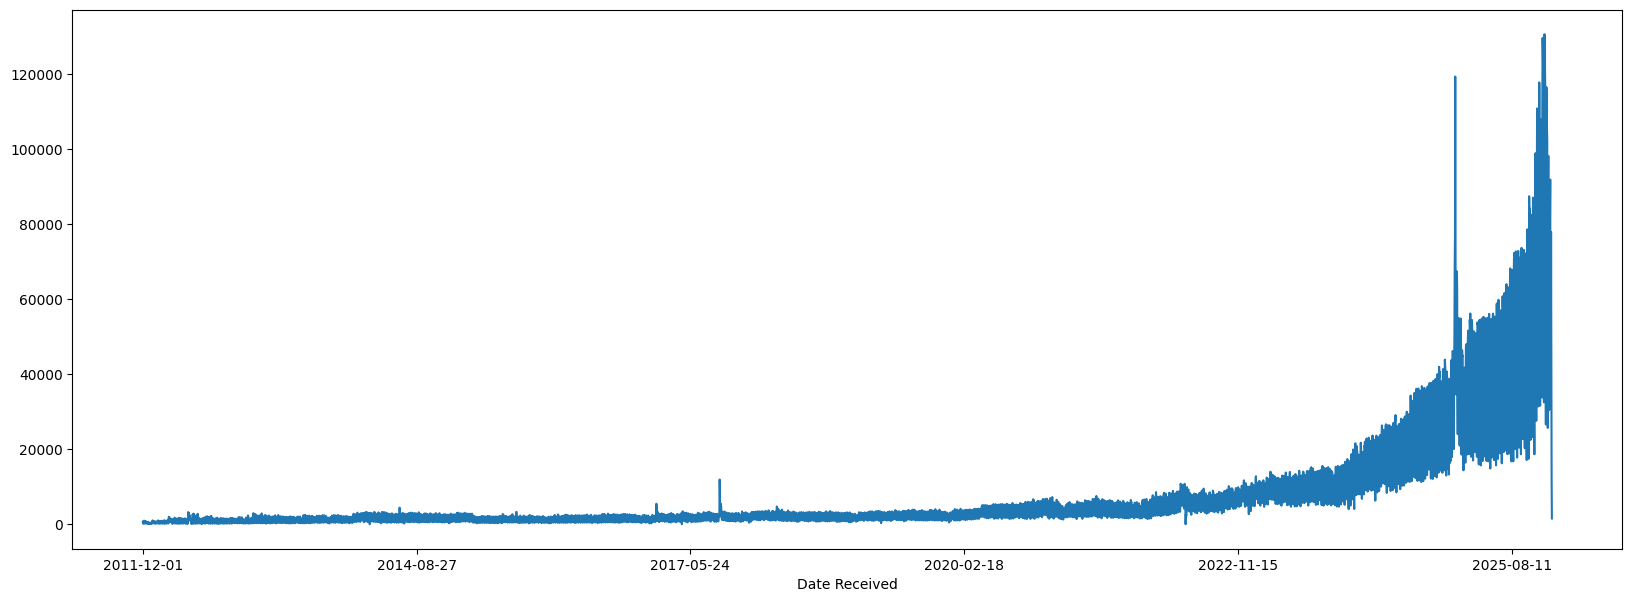

In [14]:
plt.figure(figsize=(20,7))
null_counts_by_date.plot()

In [73]:
df['Date Received'] = pd.to_datetime(df['Date Received'],yearfirst=True).dt.normalize()
df['year']=df['Date Received'].dt.year

In [ ]:
def examine_nans_by_col(df:pd.DataFrame, col_to_partition_by:str,sort_by_count:bool=True): 
    """
    where col_to_partition_by's unique values will be the column headers
    """
    #create a null df
    null_lookup=df.isna().sum()
    null_df=pd.DataFrame(null_lookup.values,index=list(null_lookup.index),columns=['Total NaN'])
    if sort_by_count==False:
        headers=sorted(list(df[col_to_partition_by].unique()))
    else:
        headers=df[col_to_partition_by].value_counts().index

    for var in headers:
        null_df[f"{var} NaN"]=df.loc[df[col_to_partition_by]==var].isna().sum().values
    if sort_by_count==False:
        total_obs = pd.DataFrame([df.shape[0]]+list(df[col_to_partition_by].value_counts(dropna=False).sort_index().to_numpy()),columns=['total_observations_per_variable']).T
    else:
        total_obs = pd.DataFrame([df.shape[0]]+list(df[col_to_partition_by].value_counts(dropna=False).to_numpy()),columns=['total_observations_per_variable']).T 
    total_obs.columns=null_df.columns
    null_df=pd.concat([null_df,total_obs])
    try:
        return null_df.style.background_gradient(cmap='RdYlBu')
    except:
        return null_df

In [ ]:
examine_nans_by_col(df, 'year',False)

In [ ]:
null_df.style.background_gradient(cmap='RdYlBu')

,Total NaN,2011 NaN,2012 NaN,2013 NaN,2014 NaN,2015 NaN,2016 NaN,2017 NaN,2018 NaN,2019 NaN,2020 NaN,2021 NaN,2022 NaN,2023 NaN,2024 NaN,2025 NaN,2026 NaN
Date received,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Product,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Sub-product,235295,1260,17226,27679,44918,53157,66708,24221,15,13,15,51,27,0,5,0,0
Issue,6,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0
Sub-issue,877001,2536,70489,82641,80390,89965,98813,58208,35722,34655,39503,46234,45138,40785,36395,115463,64
Consumer complaint narrative,9203879,2536,72372,108215,153001,113690,113611,127736,138772,152428,269949,292403,463152,804661,1922492,4434590,34271
Company public response,6125124,2536,72370,108206,152868,106729,91784,126067,127487,133284,191639,296808,341215,525864,1074150,2741091,33026
Company,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
State,58365,15,615,1053,1001,1144,1327,3971,7485,7895,8085,5769,1986,3605,6013,8381,20
ZIP code,30229,13,496,830,611,752,848,3169,6570,6979,7176,2494,174,110,5,2,0


### Takeaway:  

at some time in 2017 Consumer disputed? bacame 100% NaN through to 2026  
Consumer consent provided?, Company public response, and Consumer complaint narrative are 100% NaN <=2014  
Tags is consistently mostly NaN  

In [ ]:
m_vars=pd.Series(['a','b','c','d','e','f','g','h','i','j','k'])
m_vars.ndim

1

In [ ]:
n_vars=m_vars.unique()

n_vars.ndim


1

In [ ]:
paired=np.vstack((n_vars,n_vars))
print(paired.ndim)
print(paired.shape)
print(paired)

2
(2, 11)
[['a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k']
 ['a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k']]


In [ ]:
ar=paired.T
ar

array([['a', 'a'],
       ['b', 'b'],
       ['c', 'c'],
       ['d', 'd'],
       ['e', 'e'],
       ['f', 'f'],
       ['g', 'g'],
       ['h', 'h'],
       ['i', 'i'],
       ['j', 'j'],
       ['k', 'k']], dtype=object)

In [ ]:
trim=True if ar.shape%2==0 else False   # neet to trim the final roll at row 0 because it is duplicate when shape[0] is odd
num_rolls=int(ar.shape[0]//2)